In [ ]:

import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf



In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/DataSets/gender-recognition-200k-images-celeba.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


test_datagen = ImageDataGenerator( rescale = 1.0/255)


train_generator = train_datagen.flow_from_directory("/tmp/Dataset/Train",
                                                    batch_size = 256,
                                                    class_mode = 'binary', 
                                                    target_size = (64, 64))     

validation_generator =  test_datagen.flow_from_directory( "/tmp/Dataset/Validation",
                                                          batch_size  = 256,
                                                          class_mode  = 'binary', 
                                                          target_size = (64, 64))

Found 160000 images belonging to 2 classes.
Found 22598 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import models
from google.colab import drive

drive.mount('/content/gdrive')
model = models.load_model('/content/gdrive/MyDrive/DataSets/model5.h5')


Mounted at /content/gdrive


In [ ]:
from keras.optimizers import Adam
model = tf.keras.models.Sequential([
    # 1st conv
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(64, 64, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
    # 2nd conv
  tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
     # 3rd conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 4th conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 5th Conv
  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
  # To Flatten layer
  tf.keras.layers.Flatten(),
  # To FC layer 1
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  #To FC layer 2
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])
model.compile(
    optimizer=Adam(lr=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
   )
hist = model.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=256,
                    validation_steps=256,
                    epochs=5)

model.save('/content/gdrive/MyDrive/DataSets/model5.h5')

<ipython-input-33-069ea28a2a96>:35: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator=train_generator,


Epoch 1/5
256/256 [==============================] - ETA: 0s - loss: 0.9543 - accuracy: 0.5923

256/256 [==============================] - 176s 684ms/step - loss: 0.9543 - accuracy: 0.5923 - val_loss: 0.6048 - val_accuracy: 0.6388
Epoch 2/5
256/256 [==============================] - 132s 517ms/step - loss: 0.5378 - accuracy: 0.7306
Epoch 3/5
256/256 [==============================] - 132s 516ms/step - loss: 0.4908 - accuracy: 0.7666
Epoch 4/5
256/256 [==============================] - 132s 513ms/step - loss: 0.4475 - accuracy: 0.7905
Epoch 5/5
256/256 [==============================] - 131s 511ms/step - loss: 0.4170 - accuracy: 0.8097


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
test_datagen = ImageDataGenerator( rescale = 1.0/255)
validation_generator =  test_datagen.flow_from_directory( "/tmp/Dataset/Validation",
                                                          batch_size  = 256,
                                                          class_mode  = 'binary', 
                                                          target_size = (64, 64))


scores = model.evaluate(validation_generator, steps=89)
print("Accuracy: %.2f%%" % (scores[1]*100))

Found 22598 images belonging to 2 classes.
89/89 [==============================] - 23s 252ms/step - loss: 0.4386 - accuracy: 0.7983
Accuracy: 79.83%


In [ ]:
x_val, y_val = next(iter(validation_generator))

In [ ]:
scores = model.evaluate(x_val, y_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Saving giphy.gif to giphy.gif
1/1 [==============================] - 0s 14ms/step
[0.26826093]
 is a female


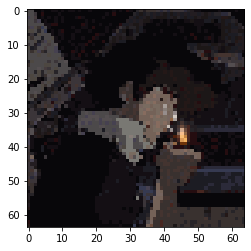

In [ ]:
import numpy as np
from google.colab import files
import keras.utils as image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inLine
uploaded = files.upload()

for fn in uploaded.keys():
   path = fn
   img = image.load_img(path, target_size=(64, 64))
   imgplot = plt.imshow(img)
   x = image.img_to_array(img)
   x = np.expand_dims(x, axis=0)
   
   images = np.vstack([x])
   classes = model.predict(images, batch_size=1)
   print(classes[0])
   if classes[0]>0.5:
      print("is a man")
   else:
      print( " is a female")
  

